In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(n_samples=1500, n_features=4,
                    n_classes=3, n_clusters_per_class=1,
                    random_state=42)
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8)
train_stimuli = {'x': train_x, 'y': train_y}
test_stimuli = {'x': test_x, 'y': test_y}

In [2]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(train_stimuli['x'])

PCA(n_components=2)

In [15]:
import pandas as pd
import plotly.graph_objs as go

chart_data = pd.DataFrame(pca.transform(train_stimuli['x']), columns=['1', '2'])
chart_data['y'] = train_stimuli['y']
trace = []
for y in chart_data['y'].unique():
    dfi = chart_data[chart_data['y'] == y]
    trace.append(go.Scatter(x=dfi['1'], y=dfi['2'], mode='markers', name=str(y)))
fig = go.Figure(data=trace)
fig.show()

In [16]:
%reload_ext autoreload
%autoreload 2


from src.nuclei.nucleus import LongNucleus1B, LongNucleus
from src.nuclei.activations import Sigmoid, Binary, Relu
from src.nuclei.losses import CrossEntropy, MAE
from src.nuclei.anneal import LongAnneal

In [26]:
n = LongNucleus1B(input_size=4, output_size=2, activation=Sigmoid(), lr=0.05)
anneal = LongAnneal(n, temp=2, loss_func=CrossEntropy(), steps=500, epochs=5)

Epoch: 1


training in epoch 1: 100%|██████████| 500/500 [00:09<00:00, 53.28it/s]


Epoch 1 validation loss: 0.2147203645888951
Epoch training loss: 0.4729421930452414
Epoch: 2


training in epoch 2: 100%|██████████| 500/500 [00:08<00:00, 56.12it/s]


Epoch 2 validation loss: 0.15586605393390388
Epoch training loss: 0.20297510056719084
Epoch: 3


training in epoch 3: 100%|██████████| 500/500 [00:09<00:00, 53.38it/s]


Epoch 3 validation loss: 0.15212896424237463
Epoch training loss: 0.1587347034904032
Epoch: 4


training in epoch 4: 100%|██████████| 500/500 [00:09<00:00, 51.24it/s]


Epoch 4 validation loss: 0.15146210012895442
Epoch training loss: 0.1424015286519894
Epoch: 5


training in epoch 5: 100%|██████████| 500/500 [00:09<00:00, 51.49it/s]

Epoch 5 validation loss: 0.15186749066512864
Epoch training loss: 0.13585871815592135


<Axes: >

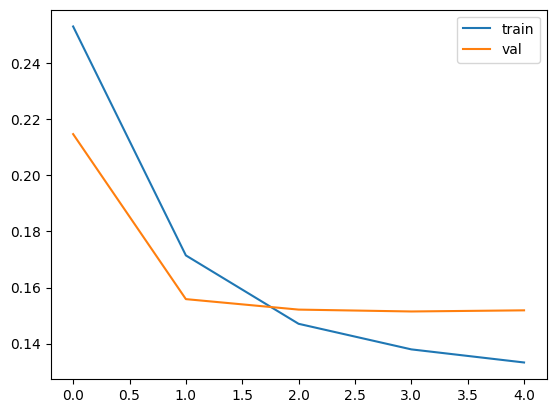

In [27]:
import pandas as pd

best, loss, val = anneal.stimulate(train_stimuli, validate=True, train_size=0.2)
pd.DataFrame(val).plot()

In [28]:
def predict_case(model, stimulus):
    pred = [str(int(round(v, 0))) for v in model.project(stimulus)]
    pred = ''.join(pred)
    return int(pred, 2)

preds = []
for i in range(len(test_stimuli['x'])):
    preds.append(predict_case(best, test_stimuli['x'][i]))

In [29]:
chart_data = pd.DataFrame(pca.transform(test_stimuli['x']), columns=['1', '2'])
chart_data['y'] = preds == test_stimuli['y']
trace = []
for y in chart_data['y'].unique():
    dfi = chart_data[chart_data['y'] == y]
    trace.append(go.Scatter(x=dfi['1'], y=dfi['2'], mode='markers', name=str(y)))
fig = go.Figure(data=trace)
fig.show()

In [30]:
(test_stimuli['y'] == preds).mean()

0.9333333333333333

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
preds = rfc.predict(test_x)

chart_data = pd.DataFrame(pca.transform(test_stimuli['x']), columns=['1', '2'])
chart_data['y'] = preds == test_stimuli['y']
trace = []
for y in chart_data['y'].unique():
    dfi = chart_data[chart_data['y'] == y]
    trace.append(go.Scatter(x=dfi['1'], y=dfi['2'], mode='markers', name=str(y)))
fig = go.Figure(data=trace)
fig.show()

In [23]:
(test_stimuli['y'] == preds).mean()

0.9233333333333333

In [24]:
from sklearn.linear_model import LogisticRegression

rfc = LogisticRegression()
rfc.fit(train_x, train_y)
preds = rfc.predict(test_x)

chart_data = pd.DataFrame(pca.transform(test_stimuli['x']), columns=['1', '2'])
chart_data['y'] = preds == test_stimuli['y']
trace = []
for y in chart_data['y'].unique():
    dfi = chart_data[chart_data['y'] == y]
    trace.append(go.Scatter(x=dfi['1'], y=dfi['2'], mode='markers', name=str(y)))
fig = go.Figure(data=trace)
fig.show()

In [25]:
(test_stimuli['y'] == preds).mean()

0.89